In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv('train.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
test=pd.read_csv('test.csv')
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

In [6]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
null_cols = train.columns[train.isnull().any()].tolist()
null_cols

[]

#### Extracting data and target

In [8]:
X=train.drop('label',axis=1)
y=train['label']

In [9]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

#### Plotting the digit

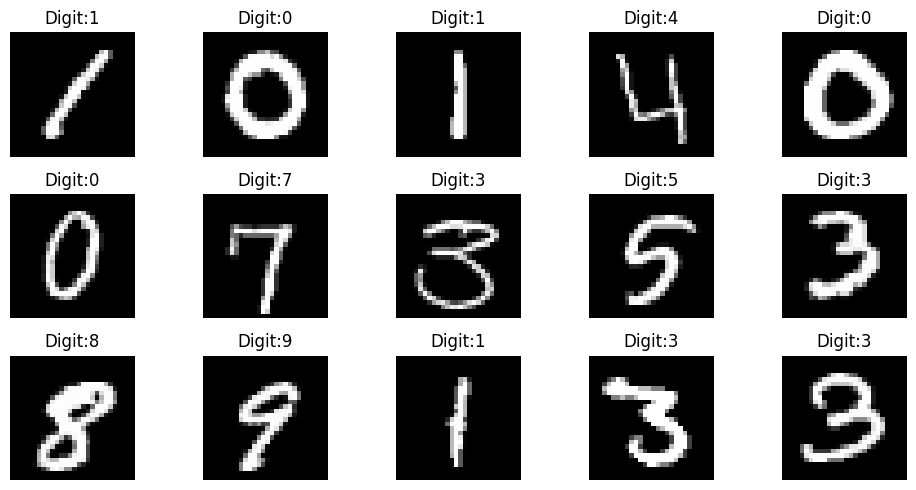

In [11]:
fig,axes=plt.subplots(3,5,figsize=(10,5))
for i,ax in enumerate(axes.flat):
    row=X.iloc[i]
    label=y[i]
    img=row.values.reshape(28,28)
    ax.imshow(img,cmap='gray')
    ax.set_title(f"Digit:{label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Spliting data into train and test

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling the data

In [71]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(33600, 784))

In [72]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8400, 784))

In [69]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [70]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Model Contruct

###### Linear Model

In [14]:
model_linear=SVC(kernel='linear')
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
y_pred=model_linear.predict(X_test)

In [16]:
y_pred

array([8, 1, 9, ..., 3, 0, 9], shape=(8400,))

###### Non-linear model

In [17]:
model_nlinear=SVC(kernel='rbf',C=10, gamma=0.001)
model_nlinear.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

In [18]:
y_pred_rbf=model_nlinear.predict(X_test)

In [19]:
y_pred_rbf

array([8, 1, 9, ..., 3, 0, 9], shape=(8400,))

#### Accuracy,confusion Matrix,classification_report

In [20]:
print(f"Accuracy of linear model:{accuracy_score(y_test,y_pred)} and of non-linear model: {accuracy_score(y_test,y_pred_rbf)}")

Accuracy of linear model:0.9208333333333333 and of non-linear model: 0.9660714285714286


In [21]:
print(f"Confusion Matrix linear model:\n {confusion_matrix(y_test,y_pred)}")

Confusion Matrix linear model:
 [[793   0   1   2   2   7   8   0   3   0]
 [  0 896   4   0   1   1   1   1   5   0]
 [  6  17 775  11   9   5   8   6   8   1]
 [  4   3  26 833   1  35   0   7  21   7]
 [  3   3  10   0 788   2   7   4   0  22]
 [  5   3   6  33  11 617   8   0  15   4]
 [ 11   2   9   0   5  10 746   0   2   0]
 [  1   4  13  10  15   0   0 821   4  25]
 [  6  12  10  37   7  22   6   4 726   5]
 [  1   2   6  14  31   7   0  28   9 740]]


In [22]:
print(f"Confusion Matrix non-linear model:\n {confusion_matrix(y_test,y_pred_rbf)}")

Confusion Matrix non-linear model:
 [[802   0   3   0   0   1   9   0   1   0]
 [  0 895   6   1   1   1   0   3   1   1]
 [  2   4 818   4   2   0   4   5   6   1]
 [  0   0   8 898   0   9   0   7  11   4]
 [  1   1   5   0 808   2   5   4   0  13]
 [  1   1   3  11   2 667  10   5   2   0]
 [  3   1   3   0   1   2 765   7   3   0]
 [  0   3   5   3   6   3   0 866   0   7]
 [  1   3   4   9   4   6   2   5 798   3]
 [  1   1   6   6   8   4   0  12   2 798]]


In [23]:
print(f"Classification report of linear model:\n {classification_report(y_test,y_pred)}")

Classification report of linear model:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.95      0.99      0.97       909
           2       0.90      0.92      0.91       846
           3       0.89      0.89      0.89       937
           4       0.91      0.94      0.92       839
           5       0.87      0.88      0.88       702
           6       0.95      0.95      0.95       785
           7       0.94      0.92      0.93       893
           8       0.92      0.87      0.89       835
           9       0.92      0.88      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [24]:
print(f"Classification report of Non-linear model:\n {classification_report(y_test,y_pred_rbf)}")

Classification report of Non-linear model:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       816
           1       0.98      0.98      0.98       909
           2       0.95      0.97      0.96       846
           3       0.96      0.96      0.96       937
           4       0.97      0.96      0.97       839
           5       0.96      0.95      0.95       702
           6       0.96      0.97      0.97       785
           7       0.95      0.97      0.96       893
           8       0.97      0.96      0.96       835
           9       0.96      0.95      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



###### Observation: Non-Linear model performs better

## Hyperparameter Tuning for the Non-Linear Model

In [35]:
folds=KFold(n_splits=3,shuffle=True,random_state=10)
hyper_param=[{
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 0.0001]
}]

#model
model=SVC(kernel='rbf')

In [38]:
model_cv=GridSearchCV(estimator=model,
                param_grid=hyper_param,
                scoring='accuracy', # You can change this to f1, recall, etc.
                cv=folds,               # 5-fold cross-validation
                verbose=1,
                n_jobs=-1
                )

In [47]:
#training the model
model_cv.fit(X_train[:20000],y_train[:20000])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=1)

In [48]:
best_score=model_cv.best_score_
best_hyperparam=model_cv.best_params_

In [49]:
model_cv.cv_results_

{'mean_fit_time': array([661.08762757, 132.51111356, 166.27407908, 617.35374101,
        107.34118279,  62.18340993, 650.5687685 , 110.77757939,
         42.19818807]),
 'std_fit_time': array([ 3.36699443,  4.69054986, 13.06112465,  0.85727699,  7.88511428,
         3.63179121,  5.58682851,  6.48049302,  3.32583681]),
 'mean_score_time': array([199.46784465, 125.43065103, 166.03180027, 229.63776628,
        109.70579147,  97.19631179, 204.00258986, 114.24274158,
         53.60695632]),
 'std_score_time': array([ 5.69506276, 21.14398427,  7.5410284 , 21.51453969, 10.08883116,
         8.71046483, 12.34752017, 19.90352794, 16.98568961]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_gamma': masked_array(data=[0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001,
                    0.0001],
              mask=[False, False, Fal

In [52]:
print("Best Accuracy: ", model_cv.best_score_)
print("Best Params: ", model_cv.best_params_)


Best Accuracy:  0.9539001372763645
Best Params:  {'C': 10, 'gamma': 0.001}


#### Final Training on best parameters

In [54]:
best_model = model_cv.best_estimator_
print(best_model)

SVC(C=10, gamma=0.001)


In [55]:
model=SVC(C=10,gamma=0.001,kernel='rbf')

In [56]:
model.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

In [57]:
y_pred_final=model.predict(X_test)

In [58]:
print(f"Accuracy of final model: {accuracy_score(y_test,y_pred_final)}")

Accuracy of final model: 0.9660714285714286


In [59]:
print(f"Confusion matirx of final model:\n {confusion_matrix(y_test,y_pred_final)}")

Confusion matirx of final model:
 [[802   0   3   0   0   1   9   0   1   0]
 [  0 895   6   1   1   1   0   3   1   1]
 [  2   4 818   4   2   0   4   5   6   1]
 [  0   0   8 898   0   9   0   7  11   4]
 [  1   1   5   0 808   2   5   4   0  13]
 [  1   1   3  11   2 667  10   5   2   0]
 [  3   1   3   0   1   2 765   7   3   0]
 [  0   3   5   3   6   3   0 866   0   7]
 [  1   3   4   9   4   6   2   5 798   3]
 [  1   1   6   6   8   4   0  12   2 798]]


In [60]:
print(f"Classification Report:\n {classification_report(y_test,y_pred_final)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       816
           1       0.98      0.98      0.98       909
           2       0.95      0.97      0.96       846
           3       0.96      0.96      0.96       937
           4       0.97      0.96      0.97       839
           5       0.96      0.95      0.95       702
           6       0.96      0.97      0.97       785
           7       0.95      0.97      0.96       893
           8       0.97      0.96      0.96       835
           9       0.96      0.95      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



## Saving the model

In [61]:
import joblib

joblib.dump(model,"digit_classifier.pkl")

['digit_classifier.pkl']

In [62]:
joblib.dump(sc,"scaler.pkl")


['scaler.pkl']

In [73]:
test=sc.transform(test)

In [74]:
prediction=model.predict(test)

In [75]:
prediction

array([2, 0, 9, ..., 3, 9, 2], shape=(28000,))

In [77]:
pred={
    'ImageID':np.arange(1,28001),
    'label':prediction
}

In [78]:
submission=pd.DataFrame(pred)

In [80]:
submission.reset_index(drop=True,inplace=True)

In [81]:
submission

,ImageID,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [82]:
submission.to_csv('submission.csv',index=False)